In [18]:

pip install prophet


# **MILES TRAVELLED**

Data Preprocessing


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/drive/MyDrive/Miles_Traveled.csv')

# Print the columns to verify names
print(data.columns)

# Ensure the DATE column is of datetime type
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Rename TRFVOLUSM227NFWA to Miles for consistency
data.rename(columns={'TRFVOLUSM227NFWA': 'Miles'}, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Display the first few rows of the data
print(data.head())

# Check the data types
print(data.dtypes)



Index(['DATE', 'TRFVOLUSM227NFWA'], dtype='object')
              Miles
DATE               
1970-01-01  80173.0
1970-02-01  77442.0
1970-03-01  90223.0
1970-04-01  89956.0
1970-05-01  97972.0
Miles    float64
dtype: object


Visualising the data


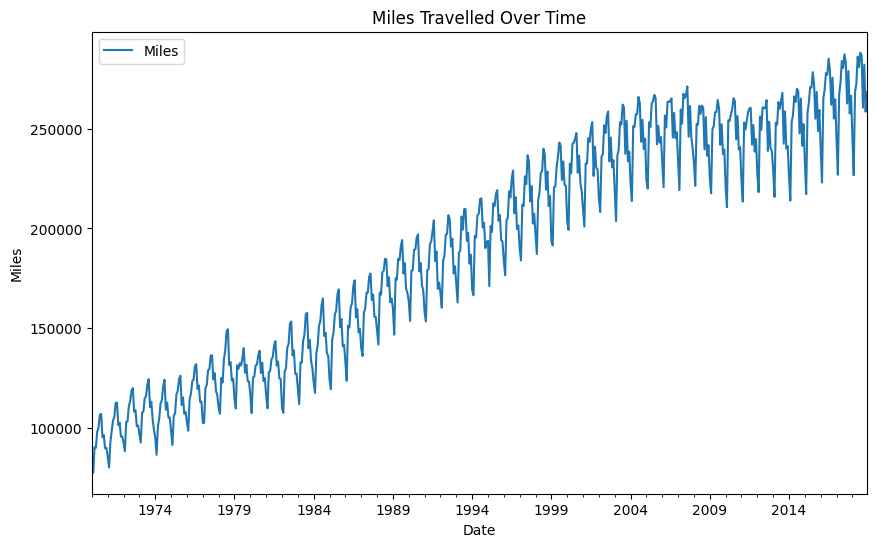

In [20]:
# Visualize the data
data.plot(figsize=(10, 6), title='Miles Travelled Over Time')
plt.xlabel('Date')
plt.ylabel('Miles')
plt.show()


Training and Evaluating ARIMA model

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Ensure the data is in the correct format
train_values = train['Miles'].values.astype(float)
test_values = test['Miles'].values.astype(float)

# Fit ARIMA model (use ACF and PACF to determine optimal parameters)
model = ARIMA(train_values, order=(5, 1, 0))  # Adjust p, d, q as needed
model_fit = model.fit()

# Forecast
forecast_arima = model_fit.forecast(steps=len(test))

# Evaluate ARIMA
rmse_arima = np.sqrt(mean_squared_error(test_values, forecast_arima))
mae_arima = mean_absolute_error(test_values, forecast_arima)

print(f'ARIMA RMSE: {rmse_arima}')
print(f'ARIMA MAE: {mae_arima}')


ARIMA RMSE: 39593.70121351479
ARIMA MAE: 35859.296409151335


Training and Evaluating PROPHET model

In [22]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare data for Prophet
prophet_data = data.reset_index()
prophet_data.rename(columns={'DATE': 'ds', 'Miles': 'y'}, inplace=True)

# Fit Prophet model
model = Prophet()
model.fit(prophet_data.iloc[:train_size])

# Create future dataframe
future = model.make_future_dataframe(periods=len(test))
forecast_prophet = model.predict(future)

# Extract the forecasted values
predictions_prophet = forecast_prophet['yhat'].iloc[-len(test):].values

# Evaluate Prophet
rmse_prophet = np.sqrt(mean_squared_error(test['Miles'], predictions_prophet))
mae_prophet = mean_absolute_error(test['Miles'], predictions_prophet)

print(f'Prophet RMSE: {rmse_prophet}')
print(f'Prophet MAE: {mae_prophet}')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/sit3mqm3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/hcf98mua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30898', 'data', 'file=/tmp/tmp46hz8jlg/sit3mqm3.json', 'init=/tmp/tmp46hz8jlg/hcf98mua.json', 'output', 'file=/tmp/tmp46hz8jlg/prophet_modelmbh_0xrh/prophet_model-20240620062428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:24:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 18753.917291881706
Prophet MAE: 14552.039981320808


Summary


In [23]:
print("Evaluation Summary")
print("------------------")
print(f'ARIMA RMSE: {rmse_arima}')
print(f'ARIMA MAE: {mae_arima}')
print(f'Prophet RMSE: {rmse_prophet}')
print(f'Prophet MAE: {mae_prophet}')


Evaluation Summary
------------------
ARIMA RMSE: 39593.70121351479
ARIMA MAE: 35859.296409151335
Prophet RMSE: 18753.917291881706
Prophet MAE: 14552.039981320808


# **ALCOHOL SALES**

Data Preprocessing

In [24]:
# Load data
data_alcohol = pd.read_csv('/content/drive/MyDrive/Alcohol_Sales.csv')

# Print the columns to verify names
print(data_alcohol.columns)

# Ensure the DATE column is of datetime type
data_alcohol['DATE'] = pd.to_datetime(data_alcohol['DATE'])
data_alcohol.set_index('DATE', inplace=True)

# Rename Sales column for consistency
data_alcohol.rename(columns={'S4248SM144NCEN': 'Sales'}, inplace=True)

# Drop rows with missing values
data_alcohol.dropna(inplace=True)

# Display the first few rows of the data
print(data_alcohol.head())



Index(['DATE', 'S4248SM144NCEN'], dtype='object')
            Sales
DATE             
1992-01-01   3459
1992-02-01   3458
1992-03-01   4002
1992-04-01   4564
1992-05-01   4221


Visualising the data


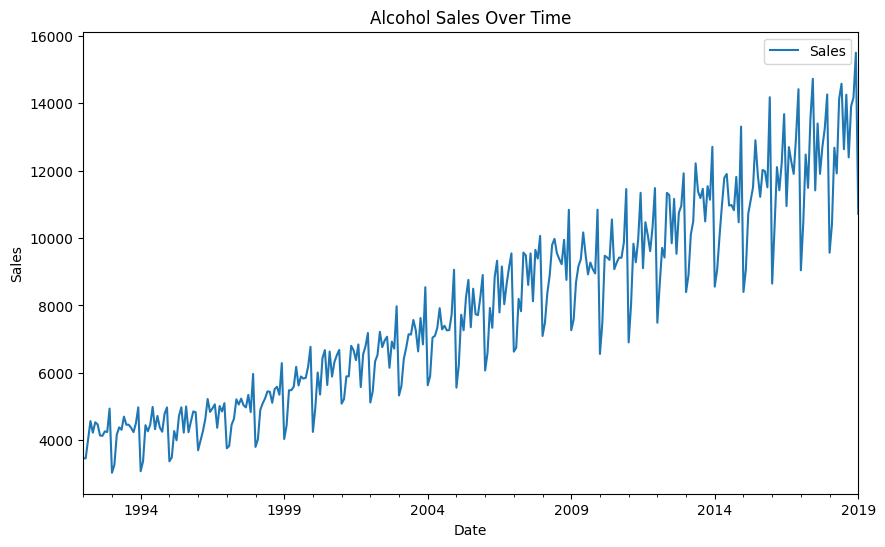

In [25]:
# Visualize the data (optional)
data_alcohol.plot(figsize=(10, 6), title='Alcohol Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


Training and Evaluating the ARIMA model


In [26]:
# Split data into train and test sets
train_size_alcohol = int(len(data_alcohol) * 0.8)
train_alcohol, test_alcohol = data_alcohol.iloc[:train_size_alcohol], data_alcohol.iloc[train_size_alcohol:]

# Ensure the data is in the correct format
train_values_alcohol = train_alcohol['Sales'].values.astype(float)
test_values_alcohol = test_alcohol['Sales'].values.astype(float)

# Fit ARIMA model (use ACF and PACF to determine optimal parameters)
model_arima_alcohol = ARIMA(train_values_alcohol, order=(5, 1, 0))  # Adjust p, d, q as needed
model_fit_arima_alcohol = model_arima_alcohol.fit()

# Forecast
forecast_arima_alcohol = model_fit_arima_alcohol.forecast(steps=len(test_alcohol))

# Evaluate ARIMA
rmse_arima_alcohol = np.sqrt(mean_squared_error(test_values_alcohol, forecast_arima_alcohol))
mae_arima_alcohol = mean_absolute_error(test_values_alcohol, forecast_arima_alcohol)

print(f'ARIMA RMSE for Alcohol Sales: {rmse_arima_alcohol}')
print(f'ARIMA MAE for Alcohol Sales: {mae_arima_alcohol}')

ARIMA RMSE for Alcohol Sales: 1754.4605642358906
ARIMA MAE for Alcohol Sales: 1397.6341359041348


Training and Evaluating PROPHET model

In [27]:
# Prepare data for Prophet
prophet_data_alcohol = data_alcohol.reset_index()
prophet_data_alcohol.rename(columns={'DATE': 'ds', 'Sales': 'y'}, inplace=True)

# Fit Prophet model
model_prophet_alcohol = Prophet()
model_prophet_alcohol.fit(prophet_data_alcohol.iloc[:train_size_alcohol])

# Create future dataframe
future_alcohol = model_prophet_alcohol.make_future_dataframe(periods=len(test_alcohol))
forecast_prophet_alcohol = model_prophet_alcohol.predict(future_alcohol)

# Extract the forecasted values
predictions_prophet_alcohol = forecast_prophet_alcohol['yhat'].iloc[-len(test_alcohol):].values

# Evaluate Prophet
rmse_prophet_alcohol = np.sqrt(mean_squared_error(test_alcohol['Sales'], predictions_prophet_alcohol))
mae_prophet_alcohol = mean_absolute_error(test_alcohol['Sales'], predictions_prophet_alcohol)

print(f'Prophet RMSE for Alcohol Sales: {rmse_prophet_alcohol}')
print(f'Prophet MAE for Alcohol Sales: {mae_prophet_alcohol}')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/4l_kcq9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/46m7oljo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83053', 'data', 'file=/tmp/tmp46hz8jlg/4l_kcq9s.json', 'init=/tmp/tmp46hz8jlg/46m7oljo.json', 'output', 'file=/tmp/tmp46hz8jlg/prophet_modelr4y_1uwi/prophet_model-20240620062429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:24:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE for Alcohol Sales: 2346.051797789406
Prophet MAE for Alcohol Sales: 1993.8205411650322


Summary


In [28]:
print("Evaluation Summary for Alcohol Sales")
print("------------------------------------")
print(f'ARIMA RMSE: {rmse_arima_alcohol}')
print(f'ARIMA MAE: {mae_arima_alcohol}')
print(f'Prophet RMSE: {rmse_prophet_alcohol}')
print(f'Prophet MAE: {mae_prophet_alcohol}')

Evaluation Summary for Alcohol Sales
------------------------------------
ARIMA RMSE: 1754.4605642358906
ARIMA MAE: 1397.6341359041348
Prophet RMSE: 2346.051797789406
Prophet MAE: 1993.8205411650322


FORECASTING  RESULTS  ON  BOTH  DATASETS

Columns in /content/drive/MyDrive/Miles_Traveled.csv: Index(['DATE', 'TRFVOLUSM227NFWA'], dtype='object')
              Miles
DATE               
1970-01-01  80173.0
1970-02-01  77442.0
1970-03-01  90223.0
1970-04-01  89956.0
1970-05-01  97972.0
Miles    float64
dtype: object
Columns in /content/drive/MyDrive/Alcohol_Sales.csv: Index(['DATE', 'S4248SM144NCEN'], dtype='object')
            Sales
DATE             
1992-01-01   3459
1992-02-01   3458
1992-03-01   4002
1992-04-01   4564
1992-05-01   4221
Sales    int64
dtype: object


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/amogtxkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/0yhsoyoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45529', 'data', 'file=/tmp/tmp46hz8jlg/amogtxkh.json', 'init=/tmp/tmp46hz8jlg/0yhsoyoj.json', 'output', 'file=/tmp/tmp46hz8jlg/prophet_modelk3nzrla5/prophet_model-20240620062430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:24:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


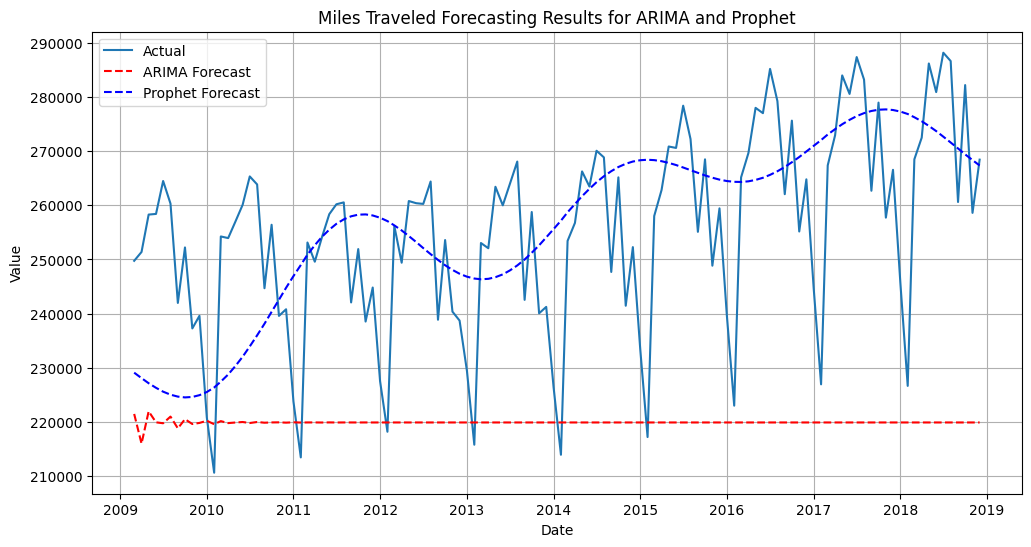

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/fr6nq_rb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46hz8jlg/5u10k7ga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43410', 'data', 'file=/tmp/tmp46hz8jlg/fr6nq_rb.json', 'init=/tmp/tmp46hz8jlg/5u10k7ga.json', 'output', 'file=/tmp/tmp46hz8jlg/prophet_model3elogmen/prophet_model-20240620062431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:24:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


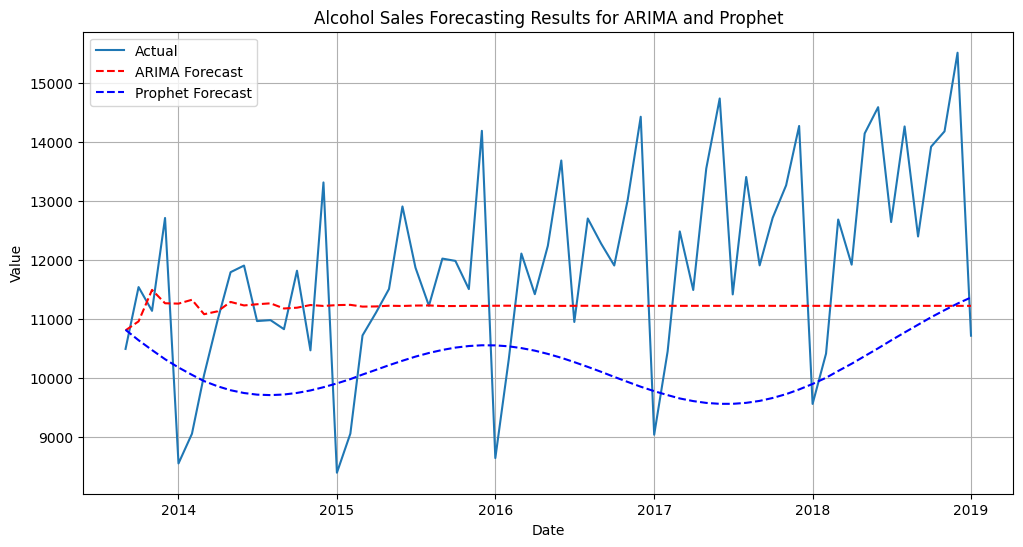

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

# Function to load and prepare data
def load_and_prepare_data(file_path, date_column, value_column, dataset_name):
    data = pd.read_csv(file_path)
    print(f"Columns in {file_path}: {data.columns}")
    data[date_column] = pd.to_datetime(data[date_column])
    data.set_index(date_column, inplace=True)

    if dataset_name == 'Miles_Traveled':
        data[value_column] = pd.to_numeric(data[value_column], errors='coerce')
        data.rename(columns={value_column: 'Miles'}, inplace=True)
    elif dataset_name == 'Alcohol_Sales':
        data[value_column] = pd.to_numeric(data[value_column], errors='coerce')
        data.rename(columns={value_column: 'Sales'}, inplace=True)

    data.dropna(inplace=True)
    print(data.head())
    print(data.dtypes)
    return data

# Function to plot results
def plot_results(actual, forecast_arima, forecast_prophet, model_name, dataset_name):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual')
    plt.plot(actual.index, forecast_arima, label=f'ARIMA Forecast', linestyle='--', color='red')
    plt.plot(actual.index, forecast_prophet, label=f'Prophet Forecast', linestyle='--', color='blue')
    plt.title(f'{model_name} Forecasting Results for {dataset_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load Miles Traveled data
miles_data = load_and_prepare_data('/content/drive/MyDrive/Miles_Traveled.csv', 'DATE', 'TRFVOLUSM227NFWA', 'Miles_Traveled')

# Load Alcohol Sales data
alcohol_data = load_and_prepare_data('/content/drive/MyDrive/Alcohol_Sales.csv', 'DATE', 'S4248SM144NCEN', 'Alcohol_Sales')

# ARIMA modeling for Miles Traveled data
train_size_miles = int(len(miles_data) * 0.8)
train_miles, test_miles = miles_data.iloc[:train_size_miles], miles_data.iloc[train_size_miles:]
train_values_miles = train_miles['Miles'].values.astype(float)
test_values_miles = test_miles['Miles'].values.astype(float)
model_arima_miles = ARIMA(train_values_miles, order=(5, 1, 0))
model_fit_arima_miles = model_arima_miles.fit()
forecast_arima_miles = model_fit_arima_miles.forecast(steps=len(test_miles))

# Prophet modeling for Miles Traveled data
prophet_data_miles = miles_data.reset_index()
prophet_data_miles.rename(columns={'DATE': 'ds', 'Miles': 'y'}, inplace=True)
model_prophet_miles = Prophet()
model_prophet_miles.fit(prophet_data_miles.iloc[:train_size_miles])
future_miles = model_prophet_miles.make_future_dataframe(periods=len(test_miles))
forecast_prophet_miles = model_prophet_miles.predict(future_miles)
predictions_prophet_miles = forecast_prophet_miles['yhat'].iloc[-len(test_miles):].values

# Plot results for Miles Traveled data
plot_results(test_miles['Miles'], forecast_arima_miles, predictions_prophet_miles, 'Miles Traveled', 'ARIMA and Prophet')

# ARIMA modeling for Alcohol Sales data
train_size_alcohol = int(len(alcohol_data) * 0.8)
train_alcohol, test_alcohol = alcohol_data.iloc[:train_size_alcohol], alcohol_data.iloc[train_size_alcohol:]
train_values_alcohol = train_alcohol['Sales'].values.astype(float)
test_values_alcohol = test_alcohol['Sales'].values.astype(float)
model_arima_alcohol = ARIMA(train_values_alcohol, order=(5, 1, 0))
model_fit_arima_alcohol = model_arima_alcohol.fit()
forecast_arima_alcohol = model_fit_arima_alcohol.forecast(steps=len(test_alcohol))

# Prophet modeling for Alcohol Sales data
prophet_data_alcohol = alcohol_data.reset_index()
prophet_data_alcohol.rename(columns={'DATE': 'ds', 'Sales': 'y'}, inplace=True)
model_prophet_alcohol = Prophet()
model_prophet_alcohol.fit(prophet_data_alcohol.iloc[:train_size_alcohol])
future_alcohol = model_prophet_alcohol.make_future_dataframe(periods=len(test_alcohol))
forecast_prophet_alcohol = model_prophet_alcohol.predict(future_alcohol)
predictions_prophet_alcohol = forecast_prophet_alcohol['yhat'].iloc[-len(test_alcohol):].values

# Plot results for Alcohol Sales data
plot_results(test_alcohol['Sales'], forecast_arima_alcohol, predictions_prophet_alcohol, 'Alcohol Sales', 'ARIMA and Prophet')
